# Some explorations of how Keras/TensorFlow can learn simple functions - part 2


In [1]:
%matplotlib inline

In [2]:
import matplotlib
from operator import xor

import numpy as np
from itertools import islice
import pandas
import seaborn
import random
import keras
from keras.layers import Dense, Activation, Dropout
from keras_tqdm import TQDMNotebookCallback


seaborn.set()

Using TensorFlow backend.


In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 3.0)

# Learning the sine function

In [4]:
x=np.linspace(0,2*np.pi,200)

In [5]:
y=np.sin(x)

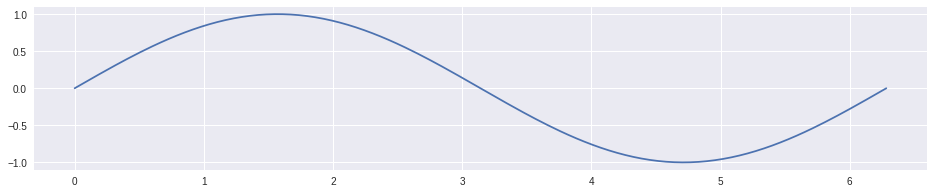

In [6]:
matplotlib.pyplot.plot(x,y)

In [7]:
def test2(model,x,y):
    
    history = model.fit(
        x,y,
        epochs=500,
        verbose=False,
        #callbacks=[TQDMNotebookCallback()],
        #validation_split=0.1
    )
    
    y_p = (model.predict(x))
    matplotlib.pyplot.title("Actual vs predicted")
    matplotlib.pyplot.plot(x,y,label='y')
    matplotlib.pyplot.plot(x,y_p,label='prediction')

    pandas.DataFrame(history.history).plot(title='Learning history')

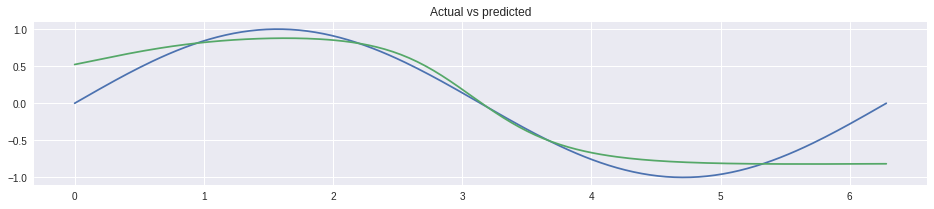

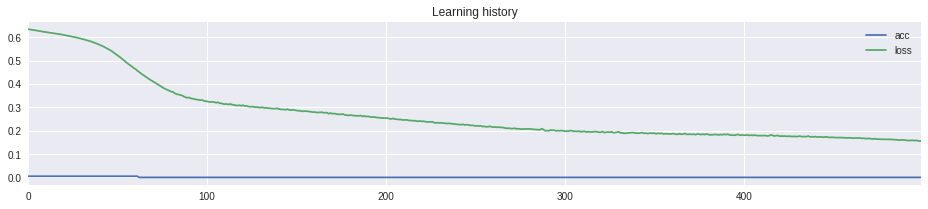

In [8]:
model=keras.models.Sequential([
        Dense(units=4, input_dim=1,activation='tanh'),
        Dense(units=2,  activation='tanh'),
        Dense(units=1 )
    ])

model.compile(loss='mae', optimizer='sgd',metrics=['accuracy'])
test2(model,x,y)

### Using a different optimizer

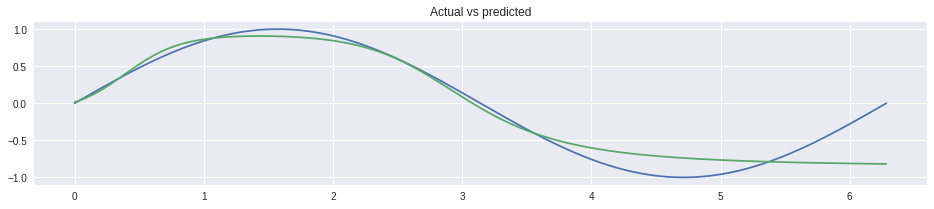

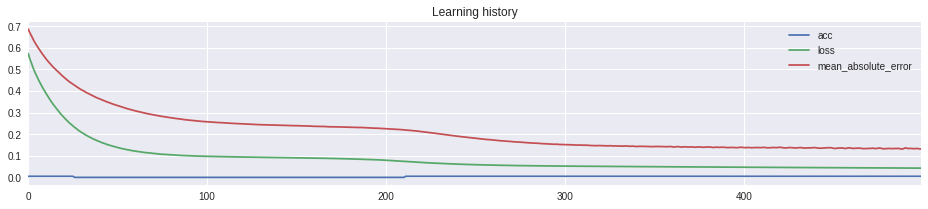

In [9]:
model=keras.models.Sequential([
        Dense(units=4, input_dim=1,activation='tanh'),
        Dense(units=2,  activation='tanh'),
        Dense(units=1,  activation='tanh')
    ])

model.compile(loss='mse', optimizer='adam',metrics=['mae','accuracy'])
test2(model,x,y)

## Bigger net

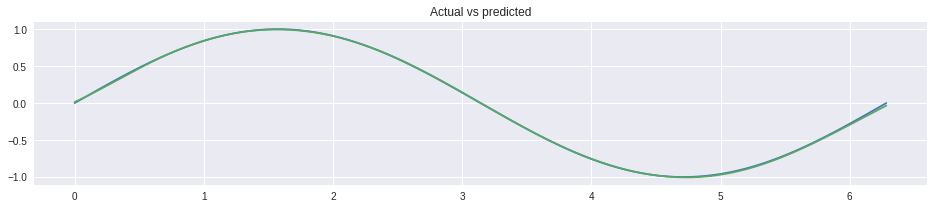

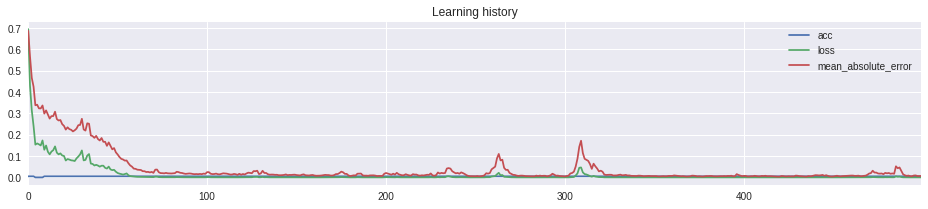

In [10]:
model=keras.models.Sequential([
        Dense(units=100, input_dim=1,activation='tanh'),
        Dense(units=100,  activation='tanh'),
        Dense(units=100,  activation='tanh'),
        Dense(units=100,  activation='tanh'),
        Dense(units=1)
    ])

model.compile(loss='mse', optimizer='adam',metrics=['mae','accuracy'])
test2(model,x,y)

## Dropout layers

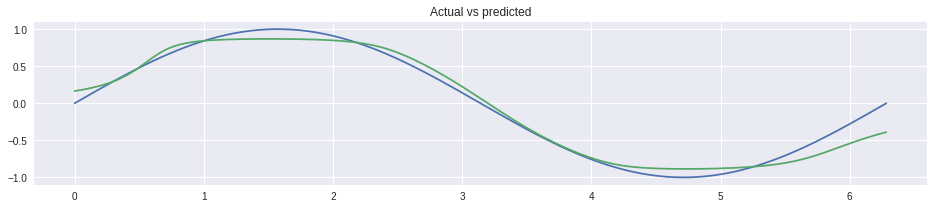

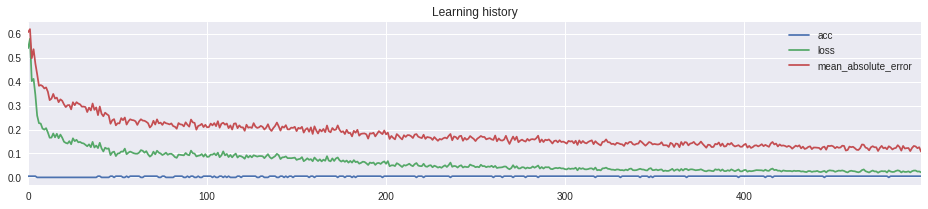

In [11]:
model=keras.models.Sequential([
        Dense(units=100, input_dim=1,activation='tanh',),
        Dropout(0.2),
        Dense(units=100,  activation='tanh'),
        Dropout(0.2),
        Dense(units=100,  activation='tanh'),
        Dropout(0.2),
        Dense(units=1,  activation='tanh')
    ])

model.compile(loss='mse', optimizer='adam',metrics=['mae','accuracy'])
test2(model,x,y)

## Regularisation

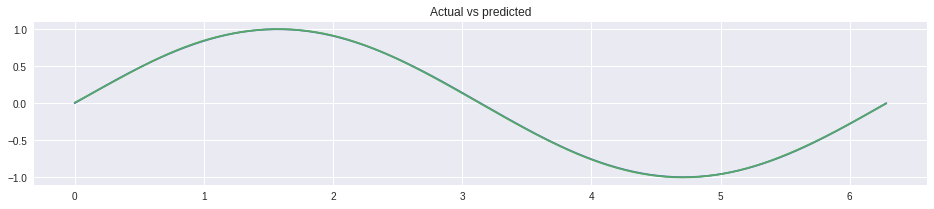

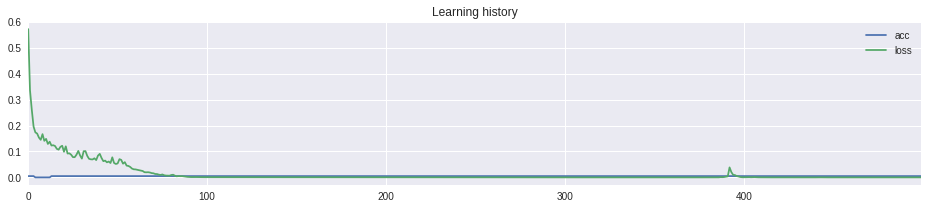

In [12]:
r = keras.regularizers.l1_l2(0.001)
r=None
model=keras.models.Sequential([
        Dense(units=100, input_dim=1,activation='tanh',kernel_regularizer=r),
        Dense(units=100,  activation='tanh',kernel_regularizer=r),
        Dense(units=100,  activation='tanh',kernel_regularizer=r),
        Dense(units=1,  )
    ])

model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
test2(model,x,y)